# Pymaceuticals Inc.
---

## Analysis
- Bar plot - Capomulin and Ramicane were tested more frequently than the other mice.
- Pie Plot - Distribution sample using half female mice (47.8%) versus male mice(52.2%)
- line plot - We need to look at the average tumor volume over a day by day time period. One mouse that was treated with Capomulin the tumor had decreased in just days of having treatment, to determine if there is a trend based we need to look at the number of days treated to see if the tumor volume has decreased or increased
- Correlation and Regression - There is a positive relationship between mouse weight and tumor size, The bigger the mouse, the bigger the tumor. if we know the weight of a mouse, we are able to calculate the size of the tumor after treatment of Capomulin.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = len(mouse_study['Mouse ID'].unique())
print(f'There were {num_mice} mice in this study')

There were 249 mice in this study


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
x = duplicated_ids['Mouse ID'].unique()
x

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study.loc[mouse_study['Mouse ID'] != 'g989', :]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_study['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_mean = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_regimen_median = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_regimen_var = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_regimen_std = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_regimen_sem = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({'Mean Tumor Volume': drug_regimen_mean, 'Median Tumor Volume': drug_regimen_median, 'Tumor Volume Variance': drug_regimen_var, 'Tumor Volume Std. Dev.': drug_regimen_std, 'Tumor Volume Std. Err.': drug_regimen_sem})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice tested')

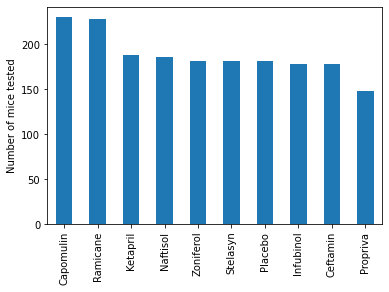

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# timepoint_by_drug = mouse_study.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
# bar_plot1 = timepoint_by_drug.plot(kind="bar", color=["green"], figsize=(8,5), alpha=.65)
drug_counts = mouse_study["Drug Regimen"].value_counts()
ax = drug_counts.plot(kind="bar")
ax.set_ylabel("Number of mice tested")

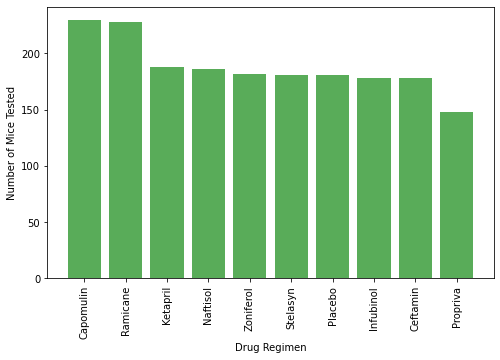

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_counts.index.values
plt.figure(figsize=(8, 5))
plt.bar(x_axis, drug_counts.values, color='green', alpha=0.65, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")   
plt.ylabel("Number of Mice Tested")
plt.show()

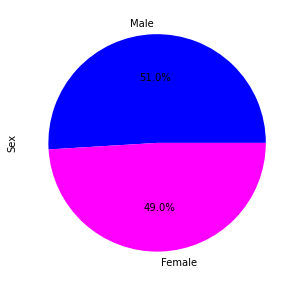

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study['Sex'].value_counts().plot(kind="pie", colors=["blue", "Fuchsia"], figsize=(8,5), autopct="%1.1f%%")


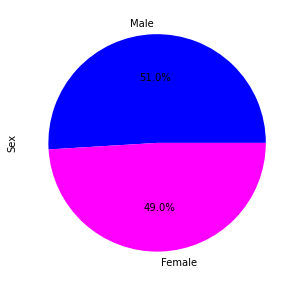

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8, 5))
plt.pie(mouse_study['Sex'].value_counts(), labels=["Male", "Female"], colors=["blue", "Fuchsia"],autopct="%1.1f%%") 
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study = mouse_study.loc[(mouse_study['Drug Regimen'] == "Capomulin") |
                               (mouse_study['Drug Regimen'] == "Ramicane") |
                               (mouse_study['Drug Regimen'] == "Infubinol") |
                               (mouse_study['Drug Regimen'] == "Ceftamin"), :]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max()).reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(max_timepoint, mouse_study, on=['Mouse ID', 'Timepoint'], how='left') 
final_tumor 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = mouse_study.loc[mouse_study['Drug Regimen'] == treatment, :]
    treatment_per_mouse = treatment_data.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
    
    # add subset 
    tumor_vol.append(treatment_per_mouse)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
        
    print(f"The interquartile range of tumor volume for {treatment} is: {round(iqr,2)}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Tumor volume values for {treatment} that are below {round(lower_bound,2)} could be outliers.")
    print(f"Tumor volume values for {treatment} that are above {round(upper_bound,2)} could be outliers.")
    print('-' *100)   

The interquartile range of tumor volume for Capomulin is: 7.31
Tumor volume values for Capomulin that are below 26.71 could be outliers.
Tumor volume values for Capomulin that are above 55.97 could be outliers.
----------------------------------------------------------------------------------------------------
The interquartile range of tumor volume for Ramicane is: 8.33
Tumor volume values for Ramicane that are below 24.19 could be outliers.
Tumor volume values for Ramicane that are above 57.49 could be outliers.
----------------------------------------------------------------------------------------------------
The interquartile range of tumor volume for Infubinol is: 10.0
Tumor volume values for Infubinol that are below 32.31 could be outliers.
Tumor volume values for Infubinol that are above 72.32 could be outliers.
----------------------------------------------------------------------------------------------------
The interquartile range of tumor volume for Ceftamin is: 9.59
Tumor

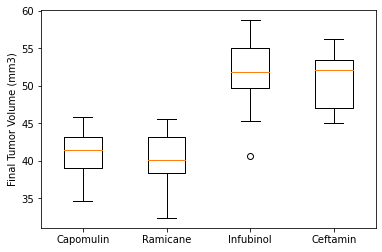

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_vol)
ax.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

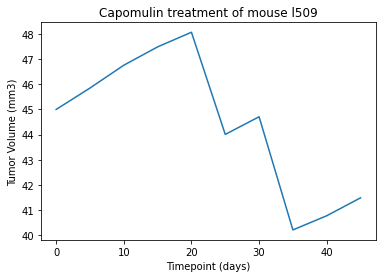

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = mouse_study.loc[(mouse_study['Drug Regimen'] == "Capomulin") & 
                         (mouse_study['Mouse ID'] == "l509"), "Timepoint"]

y_axis = mouse_study.loc[(mouse_study['Drug Regimen'] == "Capomulin") & 
                         (mouse_study['Mouse ID'] == "l509"), "Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")   
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()


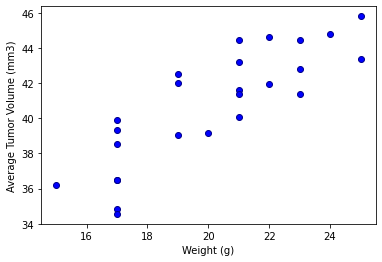

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
selected_regimen = mouse_study.loc[(mouse_study['Drug Regimen'] == "Capomulin"), :]

avg_tumor_vol = selected_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = selected_regimen.groupby('Mouse ID')['Weight (g)'].max() 

plt.scatter(mouse_weight, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="darkblue")
plt.ylabel("Average Tumor Volume (mm3)")   
plt.xlabel("Weight (g)")
plt.show()


## Correlation and Regression

The correlation between Average Tumor Volume and The Mouse Weight is 0.84


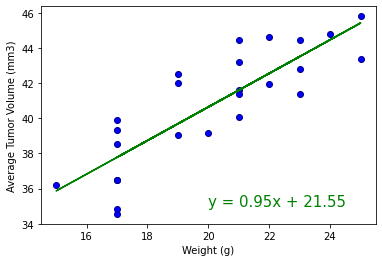

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# dependencies
from scipy.stats import linregress

## calculate correlation
corr = round(st.pearsonr(avg_tumor_vol,mouse_weight)[0],2)
print(f'The correlation between Average Tumor Volume and The Mouse Weight is {corr}')

## create plot with regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
reg_values = mouse_weight * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="darkblue")
plt.plot(mouse_weight,reg_values,"g-")
plt.annotate(line,(20,35),fontsize=15,color="green")
plt.ylabel("Average Tumor Volume (mm3)")   
plt.xlabel("Weight (g)")
plt.show()
